In [2]:
# needed imports
import numpy as np
import matplotlib.pyplot as plt

# Bernstein polynomials

Bernstein polynomials are defined by:

\begin{align}
  B_k^n (x) =  \binom{n}{k} x^k (1-x)^{n-k}, \quad \mbox{where}\quad k \in \left[0, n \right] ~ \mbox{and} ~ x \in \left[ 0, 1 \right]
  \label{eq:bernstein}
\end{align}

We first consider the evaluation of the Bernstein polynomials. 

## Evaluation of Bernstein polynomials

The following function evaluates all Bernstein polynomials of degree $n$ at $x$

In [4]:
def all_bernstein(n, x):
    b = np.zeros(n+1)
    b[0] = 1.
    x1 = 1.-x
    for j in range(1, n+1):
        saved = 0.
        for i in range(0, j):
            tmp = b[i]
            b[i] = saved + x1*tmp
            saved = x*tmp
        b[j] = saved
    return b


**exercise 1.** compute the arithmetic complexity of the evaluation of Bernstein polynomials

# Bézier curves

We recall the definition of a Bézier curve:

\begin{align}
  \mathcal{C}(t) = \sum_{k=0}^n \mathbf{P}_k B_k^n(t) 
  \label{eq:bezier-curve}
\end{align}

where $\left( \mathbf{P} \right)_{0 \le k \le n}$ are the control points or Bézier points.

## Evaluation of a point on Bézier curve

The following function evaluates a Bézier curve, given the control points $P$ at $x$. The degree of the Bernstein polynomials is computed from the length of $P$.

In [5]:
def point_on_bezier_curve(P,x):
    n = len(P) - 1
    b = all_bernstein(n, x)
    c = 0.
    for k in range(0, n+1):
        c += b[k]*P[k]
    return c

## DeCasteljau algorithm

Another way to evaluate a point on a Bézier curve is to use the DeCasteljau algorithm, which is provided below.

In [6]:
def decasteljau(P, x):
    n = len(P) - 1
    Q = P.copy()
    x1 = 1.-x
    for j in range(1, n+1):
        for i in range(0, n-j+1):
            Q[i] = x1*Q[i] + x*Q[i+1]
    c = Q[0]
    return c

## Examples

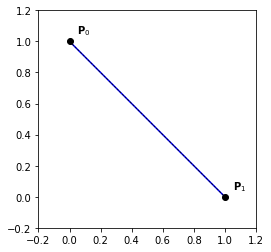

In [26]:
def example_1():    
    nt = 200
    ts = np.linspace(0., 1., nt)

    P = np.zeros((2, 2))
    P[:, 0] = [0., 1.]
    P[:, 1] = [1., 0.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-b')
    plt.plot(P[:,0], P[:,1], '--ok', linewidth=0.7)
    
    for i in range(0, 2):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')

    plt.axis([-0.2, 1.2, -0.2, 1.2])

    ax = plt.axes()
    ax.set_aspect('equal', 'box')

    
example_1()

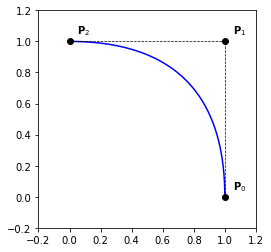

In [21]:
def example_2():    
    nt = 200
    ts = np.linspace(0., 1., nt)

    P = np.zeros((3, 2))
    P[:, 0] = [1., 1., 0.]
    P[:, 1] = [0., 1., 1.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-b')
    plt.plot(P[:,0], P[:,1], '--ok', linewidth=0.7)
    
    for i in range(0, 3):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')

    plt.axis([-0.2, 1.2, -0.2, 1.2])

    ax = plt.axes()
    ax.set_aspect('equal', 'box')

    
example_2()

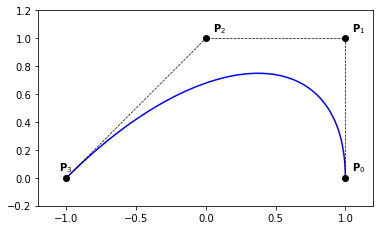

In [30]:
def example_3a():    
    nt = 200
    ts = np.linspace(0., 1., nt)

    P = np.zeros((4, 2))
    P[:, 0] = [1., 1., 0., -1.]
    P[:, 1] = [0., 1., 1.,  0.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-b')
    plt.plot(P[:,0], P[:,1], '--ok', linewidth=0.7)
    
    for i in range(0, 3):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')
    i = 3
    x,y = P[i,:]
    plt.text(x-0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')

    plt.axis([-1.2, 1.2, -0.2, 1.2])

    ax = plt.axes()
    ax.set_aspect('equal', 'box')

    
example_3a()

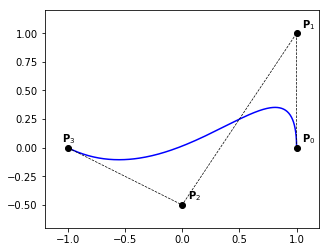

In [32]:
def example_3b():    
    nt = 200
    ts = np.linspace(0., 1., nt)

    P = np.zeros((4, 2))
    P[:, 0] = [1., 1.,  0., -1.]
    P[:, 1] = [0., 1., -0.5,  0.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-b')
    plt.plot(P[:,0], P[:,1], '--ok', linewidth=0.7)
    
    for i in range(0, 3):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')
    i = 3
    x,y = P[i,:]
    plt.text(x-0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')

    plt.axis([-1.2, 1.2, -0.7, 1.2])

    ax = plt.axes()
    ax.set_aspect('equal', 'box')

    
example_3b()

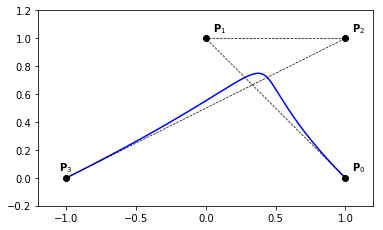

In [33]:
def example_3c():    
    nt = 200
    ts = np.linspace(0., 1., nt)

    P = np.zeros((4, 2))
    P[:, 0] = [1., 0., 1., -1.]
    P[:, 1] = [0., 1., 1.,  0.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-b')
    plt.plot(P[:,0], P[:,1], '--ok', linewidth=0.7)
    
    for i in range(0, 3):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')
    i = 3
    x,y = P[i,:]
    plt.text(x-0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')

    plt.axis([-1.2, 1.2, -0.2, 1.2])

    ax = plt.axes()
    ax.set_aspect('equal', 'box')

    
example_3c()

## Composite Bézier curve

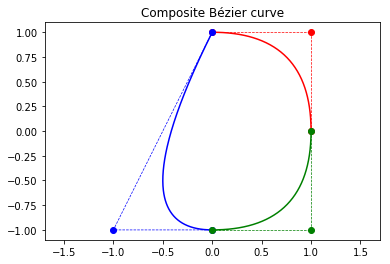

In [34]:
def plot_composite_bezier_curve():
    n = 2

    nt = 200
    ts = np.linspace(0., 1., nt)

    # ...
    P = np.zeros((3, 2))
    P[:, 0] = [1., 1., 0.]
    P[:, 1] = [0., 1., 1.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-r')
    plt.plot(P[:,0], P[:,1], '--or', linewidth=0.7)
    # ...

    # ...
    P = np.zeros((3, 2))
    P[:, 0] = [0., -1., 0.]
    P[:, 1] = [1., -1., -1.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-b')
    plt.plot(P[:,0], P[:,1], '--ob', linewidth=0.7)
    # ...

    # ...
    P = np.zeros((3, 2))
    P[:, 0] = [1., 1., 0.]
    P[:, 1] = [0., -1., -1.]

    Q = np.zeros((nt, 2))
    for i,t in enumerate(ts):
        Q[i,:] = point_on_bezier_curve(P,t)

    plt.plot(Q[:,0], Q[:,1], '-g')
    plt.plot(P[:,0], P[:,1], '--og', linewidth=0.7)
    # ...

    plt.axis('equal')
    plt.title('Composite Bézier curve')

plot_composite_bezier_curve()

# Rational Bézier curves

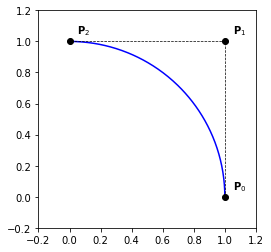

In [37]:
def example_1():    
    nt = 200
    ts = np.linspace(0., 1., nt)

    P = np.zeros((3, 2))
    P[:, 0] = [1., 1., 0.]
    P[:, 1] = [0., 1., 1.]
    
    # weights
    W = np.asarray([1., 1., 2.])
    
    # weithed control points in 3D
    Pw = np.zeros((3,3))
    for i in range(0, 3):
        Pw[i,:2] = W[i]*P[i,:]
        Pw[i,2]  = W[i]
    
    Qw = np.zeros((nt, 3))
    for i,t in enumerate(ts):
        Qw[i,:] = point_on_bezier_curve(Pw,t)

    Q = np.zeros((nt, 2))
    Q[:,0] = Qw[:,0]/Qw[:,2]
    Q[:,1] = Qw[:,1]/Qw[:,2]
    
    plt.plot(Q[:,0], Q[:,1], '-b')
    plt.plot(P[:,0], P[:,1], '--ok', linewidth=0.7)
    
    for i in range(0, 3):
        x,y = P[i,:]
        plt.text(x+0.05,y+0.05,'$\mathbf{P}_{' + str(i) + '}$')

    plt.axis([-0.2, 1.2, -0.2, 1.2])

    ax = plt.axes()
    ax.set_aspect('equal', 'box')

    
example_1()

In [2]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()